<H1>Capstone Project - The Battle of Neighborhoods in Pune Realty prices and Choice of restaurants<H1>
<H3>Part 1: Data about the Pune city Realty data<H3>

In [1]:
import numpy as np 
import pandas as pd 
!conda install -c conda-forge lxml --yes
print("Libraries installed.")

Solving environment: done

# All requested packages already installed.

Libraries installed.


<H4> A. Lets scrape data from a website to find out: Names of local areas in Pune & Property values in Rupees per sq ft<H4> 

In [2]:
from pandas import DataFrame
df = pd.read_html('https://www.moneycontrol.com/property-rates/pune/99acres-residential.html?ver=1')

In [3]:
pune1_data = df[0]
pune1_data.head()

,Pune,Capital Values Rate/Sq ft (INR),Updated on
0,Akurdi,5741,Mar 2018
1,Alandi,3900,Mar 2018
2,Ambe Gaon Budruk,4850,Mar 2018
3,Anand Nagar,6350,Mar 2018
4,Aundh,9160,Mar 2018


In [4]:
# Lets clean data and retain only useful information

pune1_data.drop("Updated on", axis=1, inplace=True)
pune1_data.rename(columns = {'Pune':'Area'}, inplace = True)
pune1_data.rename(columns = {'Capital Values Rate/Sq ft (INR)':'Rate'}, inplace = True) 
pune1_data

,Area,Rate
0,Akurdi,5741
1,Alandi,3900
2,Ambe Gaon Budruk,4850
3,Anand Nagar,6350
4,Aundh,9160
...,...,...
77,Wakad,6240
78,Wanowrie,7523
79,Wanwadi,7400
80,Warje,6850


<H4> B. We will convert the absolute property rates into Category slabs. This is done to group together areas of economic rates<H4> 

In [5]:
pune1_data['Rate'] = pune1_data['Rate'].astype(int)

# classify all areas with rates between 3000 and 5000 INR/sqft in CATEGORY 1
mask = pune1_data['Rate'] >=3000
mask = pune1_data['Rate'] <= 5000
df1= pune1_data[mask]
df1.insert(2, "Category", 1)
df1

,Area,Rate,Category
1,Alandi,3900,1
2,Ambe Gaon Budruk,4850,1
14,Chakan,3350,1
16,Chikhali,4700,1
20,Dighi,4550,1
24,Handewadi,4677,1
32,Kiwale,4900,1
37,Lohegaon,4600,1
41,Manjri,4900,1
44,Moshi,4510,1


In [6]:
# classify all areas with rates between 5000 and 7000 INR/sqft in CATEGORY 2

df2 = pune1_data.loc[(pune1_data['Rate'] >=5000) &  
              (pune1_data['Rate'] <= 7000)] 
df2.insert(2, "Category",  2)
df2

,Area,Rate,Category
0,Akurdi,5741,2
3,Anand Nagar,6350,2
5,Balewadi,6907,2
7,Bavdhan,6900,2
8,Bhosari,5180,2
10,Bhugaon,5200,2
15,Charholi,5400,2
17,Dhankawadi,5050,2
18,Dhanori,5360,2
19,Dhayari,5130,2


In [7]:
# classify all areas with rates between 7000 and 9000 INR/sqft in CATEGORY 3

df3 = pune1_data.loc[(pune1_data['Rate'] >=7000) &  
              (pune1_data['Rate'] <= 9000)] 
df3.insert(2, "Category", 3)
df3

,Area,Rate,Category
6,Baner,7323,3
11,Bibwewadi,7650,3
13,Camp,8800,3
28,Karve Nagar,8650,3
39,Magarpatta,7750,3
48,Pashan,7363,3
51,Pimple Nilakh,7690,3
52,Pimple Saudagar,7100,3
63,Shastri Nagar,8320,3
72,Veerbhadra Nagar,7550,3


In [8]:
# classify all areas with rates between 9000 and 11000 INR/sqft in CATEGORY 4

df4 = pune1_data.loc[(pune1_data['Rate'] >=9000) &  
              (pune1_data['Rate'] <= 11000)] 
df4.insert(2, "Category", 4)
df4

,Area,Rate,Category
4,Aundh,9160,4
27,Kalyani Nagar,9400,4
35,Kothrud,9703,4
59,Sadashiv Peth,10705,4
64,Sopan Baug,10280,4


In [9]:
# classify all areas with rates between 11000 and 16000 INR/sqft in CATEGORY 5

df5 = pune1_data.loc[(pune1_data['Rate'] >=11000) &  
              (pune1_data['Rate'] <= 16000)] 
df5.insert(2, "Category", 5)
df5

,Area,Rate,Category
9,Bhosle Nagar,13925,5
12,Boat Club Road,13900,5
21,Erandwane,12477,5
34,Koregaon Park,11350,5
36,Law College Road,15000,5
55,Prabhat Road,15540,5
62,Senapati Bapat Road,13120,5


In [10]:
rslt_df = pd.concat([df1, df2,df3, df4, df5], axis=0)
rslt_df

,Area,Rate,Category
1,Alandi,3900,1
2,Ambe Gaon Budruk,4850,1
14,Chakan,3350,1
16,Chikhali,4700,1
20,Dighi,4550,1
...,...,...,...
21,Erandwane,12477,5
34,Koregaon Park,11350,5
36,Law College Road,15000,5
55,Prabhat Road,15540,5


<H4> C. Let us get coordinates of these neighborhoods using Geopy<H4> 

In [11]:
!conda install -c conda-forge geopy --yes
print("Libraries installed.")

Solving environment: done

# All requested packages already installed.

Libraries installed.


In [12]:
# Lets check if everything works
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

address = 'Pune'
geolocator = Nominatim(user_agent="punerealty")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Pune are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Pune are 18.521428, 73.8544541.


I realize now that the geopy data is missing for some of the neighborhoods. So lets identify these areas and filter them out

In [13]:


locator = Nominatim(user_agent="myGeocoder")

err = []

for ind in rslt_df.index: 
    location = locator.geocode(rslt_df.loc[ind,"Area"])
    if location is None:
        print("This area code does not have Coordinates: ", rslt_df.loc[ind,"Area"])
        err.append(rslt_df.loc[ind,"Area"])

This area code does not have Coordinates:  Ambe Gaon Budruk
This area code does not have Coordinates:  Charholi
This area code does not have Coordinates:  Dhankawadi
This area code does not have Coordinates:  Mohamadwadi
This area code does not have Coordinates:  Salunke Vihar
This area code does not have Coordinates:  Tingre Nagar
This area code does not have Coordinates:  Wanwadi
This area code does not have Coordinates:  Erandwane


Now we know what to look out for, lets drop these areas from the master dataframe 

In [14]:
# Now to clean up the data frame to drop the Areas which do not have geo coordinates 

pune_cln = rslt_df[~rslt_df['Area'].isin(err)] 

# Lets poulate the clean dataframe with Latitide & Longitude of all the areas

pune_cln['Major_Dist_Coord']= pune_cln['Area'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

pune_cln[['Latitude', 'Longitude']] = pune_cln['Major_Dist_Coord'].apply(pd.Series)

pune_cln.drop(['Major_Dist_Coord'], axis=1, inplace=True)
pune_cln

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

,Area,Rate,Category,Latitude,Longitude
1,Alandi,3900,1,18.677245,73.898113
14,Chakan,3350,1,46.540644,17.271490
16,Chikhali,4700,1,20.935774,79.729506
20,Dighi,4550,1,26.882192,78.149700
24,Handewadi,4677,1,18.485162,73.931680
...,...,...,...,...,...
12,Boat Club Road,13900,5,32.860278,-97.426164
34,Koregaon Park,11350,5,18.537553,73.893925
36,Law College Road,15000,5,27.490120,95.361979
55,Prabhat Road,15540,5,30.325832,78.038904


Visually inspecting the data shows a lot of errors. The coordinates returned by GeoPy are all over the place! Lets bruteforce this by applying a range of legitimate values for Pune and discard the rest 

In [15]:

pune_df = pune_cln.loc[(pune_cln['Latitude'] >=18.4) &  
              (pune_cln['Latitude'] <= 18.65) & (pune_cln['Longitude'] >=73.74) &  
              (pune_cln['Longitude'] <= 73.98)] 
pune_df

,Area,Rate,Category,Latitude,Longitude
24,Handewadi,4677,1,18.485162,73.931680
37,Lohegaon,4600,1,18.580330,73.918386
46,Narhe,4747,1,18.460143,73.826010
0,Akurdi,5741,2,18.648642,73.764708
3,Anand Nagar,6350,2,18.478490,73.821326
5,Balewadi,6907,2,18.582027,73.768983
7,Bavdhan,6900,2,18.520954,73.778087
8,Bhosari,5180,2,18.621009,73.850130
19,Dhayari,5130,2,18.437398,73.819043
22,Fatima Nagar,6705,2,18.504510,73.902129


<H4> D. Let visually inpect the data by plotting it, Also lets do a first level analysis of Realty price spread<H4> 

In [16]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

print("Installation Done")

Solving environment: done

# All requested packages already installed.

Installation Done


In [17]:
# create map of Pune using latitude and longitude 
map_pune = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the five clusters
x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
for lat, lng, poi, cat in zip(pune_df['Latitude'], pune_df['Longitude'], pune_df['Area'], pune_df['Category']):

    label = folium.Popup(str(poi) + ' category ' + str(cat), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cat-1],
        fill=True,
        fill_color=rainbow[cat-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_pune) 
    
map_pune


Conclusion 1 Already we see a lovely heatmapish clustering! The areas on the outskirts (Purple) are Category 1 (Cheapest to live in) and the ones in the  center (RED) are category 5. The concentric circles show a clear gradation: The cost of your property increases as you go towards the city center 

<H3>Part 2: Venue specific Geospatial data from Foursquare<H3>

In [18]:
import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe



# import k-means from clustering stage
from sklearn.cluster import KMeans

In [19]:
CLIENT_ID = 'CDT3TOZMVLHAVWOYY0XBQU2XQEGDPDRBYQC0D0GR2PZRIJN4' # your Foursquare ID
CLIENT_SECRET = 'ZPN05YKIVPU0U4ZMDOPX2QUWOLL0AG4X5HV3X1IBABOSML4E' # your Foursquare Secret
ACCESS_TOKEN = 'K3100IEGMSMBTTJS04SFOOXPJSJ2H4WREXQ2DTRQPEQCIMF3' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CDT3TOZMVLHAVWOYY0XBQU2XQEGDPDRBYQC0D0GR2PZRIJN4
CLIENT_SECRET:ZPN05YKIVPU0U4ZMDOPX2QUWOLL0AG4X5HV3X1IBABOSML4E


In [20]:
neighborhood_latitude = pune_df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = pune_df.loc[0, 'Longitude'] # neighborhood longitude value
neighborhood_name = pune_df.loc[0, 'Area'] # neighborhood name

LIMIT = 15

radius = 600

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display UR

'https://api.foursquare.com/v2/venues/explore?&client_id=CDT3TOZMVLHAVWOYY0XBQU2XQEGDPDRBYQC0D0GR2PZRIJN4&client_secret=ZPN05YKIVPU0U4ZMDOPX2QUWOLL0AG4X5HV3X1IBABOSML4E&v=20180604&ll=18.64864175,73.76470807178595&radius=600&limit=15'

In [21]:
# Try to get venues for the first Area Akurdi

results = requests.get(url).json()
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,lat,lng
0,Shawarma King,Middle Eastern Restaurant,18.649124,73.765480
1,SKS Katthi Kabab Rolls,Asian Restaurant,18.648234,73.765805
2,Cafe Aroma,Café,18.650155,73.766566
3,Café Crème,Café,18.648282,73.765939
4,Hotel Annapurna,Indian Restaurant,18.648775,73.764911


In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [23]:
pune_venues = getNearbyVenues(names=pune_df['Area'],
                                   latitudes=pune_df['Latitude'],
                                   longitudes=pune_df['Longitude']
                                  )

Handewadi
Lohegaon
Narhe
Akurdi
Anand Nagar
Balewadi
Bavdhan
Bhosari
Dhayari
Fatima Nagar
Hadapsar
Hinjewadi
Katraj
Keshav Nagar
Kondhwa
Lullanagar
Mundhwa
Pimple Gurav
Punawale
Rahatani
Ravet
Sasane Nagar
Tathawade
Vadgaon Budruk
Vishrantwadi
Wadgaon Sheri
Wakad
Warje
Bibwewadi
Karve Nagar
Magarpatta
Pashan
Pimple Nilakh
Pimple Saudagar
Wanowrie
Yerwada
Aundh
Kalyani Nagar
Kothrud
Sadashiv Peth
Sopan Baug
Koregaon Park
Senapati Bapat Road


In [24]:
pune_venues.shape

(2915, 7)

In [25]:
pune_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Handewadi,18.485162,73.93168,Doolally@1st Brewhouse,18.463242,73.919251,Brewery
1,Handewadi,18.485162,73.93168,Natural's Ice Cream,18.510202,73.931386,Ice Cream Shop
2,Handewadi,18.485162,73.93168,Corinthians Boutique Hotel,18.462958,73.919002,Resort
3,Handewadi,18.485162,73.93168,Fat Cat's Cafe,18.481174,73.904939,Café
4,Handewadi,18.485162,73.93168,"Abs Sports Club, Magarpatta",18.510861,73.926175,Gym


In [26]:
# Create a Data-Frame out of it to concentrate only on Restaurants 
pune_venues_only_restaurant = pune_venues[pune_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
pune_venues_only_restaurant.index = np.arange(1, len(pune_venues_only_restaurant )+1)

In [27]:
pune_venues_only_restaurant

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Handewadi,18.485162,73.931680,Marrakesh,18.509430,73.928296,Middle Eastern Restaurant
2,Handewadi,18.485162,73.931680,Rolls Mania,18.509609,73.928547,Fast Food Restaurant
3,Handewadi,18.485162,73.931680,Kokkita,18.502177,73.937133,Indian Restaurant
4,Handewadi,18.485162,73.931680,City Cafe,18.509279,73.928375,Fast Food Restaurant
5,Handewadi,18.485162,73.931680,Vaibhavi Food Court,18.510085,73.928015,Indian Restaurant
...,...,...,...,...,...,...,...
1068,Senapati Bapat Road,18.525574,73.829548,Aware Maratha Khanawal,18.512948,73.845200,Indian Restaurant
1069,Senapati Bapat Road,18.525574,73.829548,Darshan foods,18.514021,73.840978,Vegetarian / Vegan Restaurant
1070,Senapati Bapat Road,18.525574,73.829548,Fish Curry Rice,18.510713,73.829623,Seafood Restaurant
1071,Senapati Bapat Road,18.525574,73.829548,Chinese Room Oriental,18.510482,73.834788,Chinese Restaurant


<H4> E. Let us Merge this Venue information with the master dataframe<H4> 

In [28]:
#Merge  this dataframe with the Realty category

rslt_df.rename(columns = {'Area':'Neighborhood'}, inplace = True) # keeping things clean by renaming Area to Neighborhood

pune_venues_only_restaurant = pd.merge(pune_venues_only_restaurant, rslt_df, on='Neighborhood')

pune_venues_only_restaurant


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Rate,Category
0,Handewadi,18.485162,73.931680,Marrakesh,18.509430,73.928296,Middle Eastern Restaurant,4677,1
1,Handewadi,18.485162,73.931680,Rolls Mania,18.509609,73.928547,Fast Food Restaurant,4677,1
2,Handewadi,18.485162,73.931680,Kokkita,18.502177,73.937133,Indian Restaurant,4677,1
3,Handewadi,18.485162,73.931680,City Cafe,18.509279,73.928375,Fast Food Restaurant,4677,1
4,Handewadi,18.485162,73.931680,Vaibhavi Food Court,18.510085,73.928015,Indian Restaurant,4677,1
...,...,...,...,...,...,...,...,...,...
1067,Senapati Bapat Road,18.525574,73.829548,Aware Maratha Khanawal,18.512948,73.845200,Indian Restaurant,13120,5
1068,Senapati Bapat Road,18.525574,73.829548,Darshan foods,18.514021,73.840978,Vegetarian / Vegan Restaurant,13120,5
1069,Senapati Bapat Road,18.525574,73.829548,Fish Curry Rice,18.510713,73.829623,Seafood Restaurant,13120,5
1070,Senapati Bapat Road,18.525574,73.829548,Chinese Room Oriental,18.510482,73.834788,Chinese Restaurant,13120,5


In [29]:
print (pune_venues_only_restaurant['Venue Category'].value_counts())

Indian Restaurant                  371
Fast Food Restaurant               137
Italian Restaurant                  80
Chinese Restaurant                  77
Restaurant                          65
Asian Restaurant                    50
Vegetarian / Vegan Restaurant       49
Seafood Restaurant                  42
South Indian Restaurant             35
American Restaurant                 24
Middle Eastern Restaurant           14
French Restaurant                   13
Mediterranean Restaurant            12
Thai Restaurant                      9
Multicuisine Indian Restaurant       9
Maharashtrian Restaurant             8
Mexican Restaurant                   8
Falafel Restaurant                   8
Indian Chinese Restaurant            6
Brazilian Restaurant                 6
Mughlai Restaurant                   5
Dim Sum Restaurant                   5
North Indian Restaurant              5
Southern / Soul Food Restaurant      4
English Restaurant                   4
Molecular Gastronomy Rest

In [30]:
print('There are {} unique categories.'.format(len(pune_venues['Venue Category'].unique())))


There are 144 unique categories.


In [31]:
pune_venues_Top10 = pune_venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
pune_venues_Top10 = pune_venues_Top10.reset_index()
pune_venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
pune_venues_Top10

,Venue_Category,Frequency
0,Indian Restaurant,371
1,Fast Food Restaurant,137
2,Italian Restaurant,80
3,Chinese Restaurant,77
4,Restaurant,65
5,Asian Restaurant,50
6,Vegetarian / Vegan Restaurant,49
7,Seafood Restaurant,42
8,South Indian Restaurant,35
9,American Restaurant,24


<H4> F. Let us visually plot these categories to check food cuisine options<H4> 

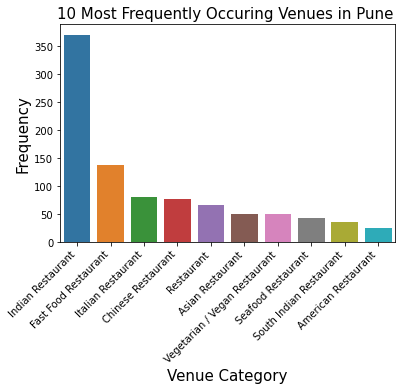

<Figure size 1296x504 with 0 Axes>

In [32]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=pune_venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in Pune ', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

We can conclude that while Pune is a cosmopolitan city the predominant cuisine is Indian

In [33]:
pune_Venues_restaurant = pune_venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [34]:
pune_Venues_restaurant

Neighborhood
Akurdi                 21
Anand Nagar            24
Aundh                  43
Balewadi               31
Bavdhan                19
Bhosari                 3
Bibwewadi              32
Fatima Nagar           40
Hadapsar               38
Handewadi              11
Hinjewadi              38
Kalyani Nagar          34
Karve Nagar            28
Katraj                  2
Keshav Nagar           34
Kondhwa                21
Koregaon Park          35
Kothrud                18
Lohegaon               27
Lullanagar             28
Magarpatta             33
Mundhwa                36
Narhe                   2
Pashan                 40
Pimple Gurav            8
Pimple Nilakh          43
Pimple Saudagar        18
Punawale                8
Rahatani               27
Ravet                  11
Sadashiv Peth          49
Sasane Nagar           26
Senapati Bapat Road    37
Sopan Baug             40
Tathawade              31
Vadgaon Budruk          8
Vishrantwadi            4
Wadgaon Sheri          31

In [35]:
pune_Venues_restaurant_df  = pune_Venues_restaurant.to_frame().reset_index()
pune_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
pune_Venues_restaurant_df.index = np.arange(1, len(pune_Venues_restaurant_df)+1)
list_rest_no =pune_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =pune_Venues_restaurant_df['Neighborhood'].to_list()

<H4> G. Lets now start to cluster the neighborhoods<H4>

In [36]:
# one hot encoding
pune_onehot = pd.get_dummies(pune_venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
pune_onehot['Neighborhood'] = pune_venues_only_restaurant['Neighborhood'] 


# move neighborhood column to the first column
fixed_columns = [pune_onehot.columns[-1]] + list(pune_onehot.columns[:-1])
pune_onehot = pune_onehot[fixed_columns]

pune_onehot


,Neighborhood,American Restaurant,Andhra Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,English Restaurant,...,North Indian Restaurant,Parsi Restaurant,Punjabi Restaurant,Restaurant,Seafood Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
0,Handewadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Handewadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Handewadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Handewadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Handewadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,Senapati Bapat Road,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1068,Senapati Bapat Road,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1069,Senapati Bapat Road,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1070,Senapati Bapat Road,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:

pune_grouped = pune_onehot.groupby('Neighborhood').mean().reset_index()
pune_grouped

,Neighborhood,American Restaurant,Andhra Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,English Restaurant,...,North Indian Restaurant,Parsi Restaurant,Punjabi Restaurant,Restaurant,Seafood Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
0,Akurdi,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.047619,0.047619
1,Anand Nagar,0.000000,0.000000,0.083333,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.041667,0.083333,0.000000,0.000000,0.000000,0.000000,0.083333
2,Aundh,0.000000,0.000000,0.023256,0.000000,0.069767,0.000000,0.000000,0.000000,0.023256,...,0.000000,0.000,0.000000,0.116279,0.023256,0.093023,0.000000,0.000000,0.023256,0.023256
3,Balewadi,0.064516,0.000000,0.032258,0.000000,0.064516,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.032258,0.000000,0.032258,0.096774,0.000000,0.000000,0.000000,0.000000
4,Bavdhan,0.000000,0.000000,0.105263,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.052632
5,Bhosari,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Bibwewadi,0.031250,0.000000,0.093750,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.031250,0.031250,0.000000,0.031250,0.000000,0.000000,0.093750
7,Fatima Nagar,0.025000,0.000000,0.050000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Hadapsar,0.026316,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.026316,0.000000,...,0.000000,0.000,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Handewadi,0.000000,0.000000,0.090909,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Print the neighbourhoods with their respective top 10 most common venues

In [38]:
num_top_venues = 10

for hood in pune_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = pune_grouped[pune_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Akurdi----
                           venue  freq
0              Indian Restaurant  0.48
1               Asian Restaurant  0.14
2           Fast Food Restaurant  0.10
3                     Restaurant  0.05
4      Middle Eastern Restaurant  0.05
5             Italian Restaurant  0.05
6  Vegetarian / Vegan Restaurant  0.05
7                Thai Restaurant  0.05
8             Mexican Restaurant  0.05
9             Seafood Restaurant  0.00


----Anand Nagar----
                             venue  freq
0                Indian Restaurant  0.46
1             Fast Food Restaurant  0.17
2               Seafood Restaurant  0.08
3    Vegetarian / Vegan Restaurant  0.08
4                 Asian Restaurant  0.08
5               Chinese Restaurant  0.04
6                       Restaurant  0.04
7                French Restaurant  0.04
8               Tex-Mex Restaurant  0.00
9  Southern / Soul Food Restaurant  0.00


----Aundh----
                             venue  freq
0                Indian Re

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]



indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = pune_grouped['Neighborhood']

for ind in np.arange(pune_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(pune_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Akurdi,Indian Restaurant,Asian Restaurant,Fast Food Restaurant,Italian Restaurant,Thai Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Dumpling Restaurant
1,Anand Nagar,Indian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Seafood Restaurant,Restaurant,Chinese Restaurant,French Restaurant,Falafel Restaurant,Indian Chinese Restaurant
2,Aundh,Indian Restaurant,Restaurant,South Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Asian Restaurant,English Restaurant,Italian Restaurant
3,Balewadi,Indian Restaurant,Fast Food Restaurant,South Indian Restaurant,Chinese Restaurant,Italian Restaurant,American Restaurant,Punjabi Restaurant,Seafood Restaurant,Asian Restaurant,French Restaurant
4,Bavdhan,Indian Restaurant,Asian Restaurant,Seafood Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Mediterranean Restaurant,Falafel Restaurant,Indian Chinese Restaurant,Greek Restaurant
5,Bhosari,Indian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Indian Chinese Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,English Restaurant
6,Bibwewadi,Indian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Italian Restaurant,Mughlai Restaurant,Falafel Restaurant,American Restaurant,Southern / Soul Food Restaurant
7,Fatima Nagar,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,Asian Restaurant,Falafel Restaurant,Indian Chinese Restaurant,Middle Eastern Restaurant,American Restaurant,Parsi Restaurant
8,Hadapsar,Indian Restaurant,Italian Restaurant,Fast Food Restaurant,Chinese Restaurant,Middle Eastern Restaurant,Eastern European Restaurant,Greek Restaurant,Mediterranean Restaurant,Falafel Restaurant,American Restaurant
9,Handewadi,Indian Restaurant,Fast Food Restaurant,Asian Restaurant,Chinese Restaurant,Restaurant,Greek Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Falafel Restaurant,Indian Chinese Restaurant


In [40]:
# set number of clusters (I choose 5)
kclusters = 5

pune_grouped_clustering = pune_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(pune_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 4, 1, 2, 3, 1], dtype=int32)

In [41]:
pune_merged = pune_df
pune_merged.shape

(43, 5)

In [42]:
neighborhoods_venues_sorted.shape

(42, 11)

In [43]:
# Now we see a fresh error as the shapes of two dataframes are different. 
# The suburb "Dhayari" does not have venue data. Lets drop it

pune_merged.drop(pune_merged[pune_merged['Area'] == "Dhayari"].index, inplace = True) 
pune_merged.shape

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(42, 5)

In [44]:
pune_merged

,Area,Rate,Category,Latitude,Longitude
24,Handewadi,4677,1,18.485162,73.931680
37,Lohegaon,4600,1,18.580330,73.918386
46,Narhe,4747,1,18.460143,73.826010
0,Akurdi,5741,2,18.648642,73.764708
3,Anand Nagar,6350,2,18.478490,73.821326
5,Balewadi,6907,2,18.582027,73.768983
7,Bavdhan,6900,2,18.520954,73.778087
8,Bhosari,5180,2,18.621009,73.850130
22,Fatima Nagar,6705,2,18.504510,73.902129
23,Hadapsar,5900,2,18.526967,73.927825


In [45]:
neighborhoods_venues_sorted_w_clusters = neighborhoods_venues_sorted
# add clustering labels
neighborhoods_venues_sorted_w_clusters.insert(0, 'Cluster Labels', kmeans.labels_)

In [46]:
neighborhoods_venues_sorted_w_clusters

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Akurdi,Indian Restaurant,Asian Restaurant,Fast Food Restaurant,Italian Restaurant,Thai Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Dumpling Restaurant
1,1,Anand Nagar,Indian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Seafood Restaurant,Restaurant,Chinese Restaurant,French Restaurant,Falafel Restaurant,Indian Chinese Restaurant
2,1,Aundh,Indian Restaurant,Restaurant,South Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Asian Restaurant,English Restaurant,Italian Restaurant
3,1,Balewadi,Indian Restaurant,Fast Food Restaurant,South Indian Restaurant,Chinese Restaurant,Italian Restaurant,American Restaurant,Punjabi Restaurant,Seafood Restaurant,Asian Restaurant,French Restaurant
4,1,Bavdhan,Indian Restaurant,Asian Restaurant,Seafood Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Mediterranean Restaurant,Falafel Restaurant,Indian Chinese Restaurant,Greek Restaurant
5,4,Bhosari,Indian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Indian Chinese Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,English Restaurant
6,1,Bibwewadi,Indian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Italian Restaurant,Mughlai Restaurant,Falafel Restaurant,American Restaurant,Southern / Soul Food Restaurant
7,2,Fatima Nagar,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,Asian Restaurant,Falafel Restaurant,Indian Chinese Restaurant,Middle Eastern Restaurant,American Restaurant,Parsi Restaurant
8,3,Hadapsar,Indian Restaurant,Italian Restaurant,Fast Food Restaurant,Chinese Restaurant,Middle Eastern Restaurant,Eastern European Restaurant,Greek Restaurant,Mediterranean Restaurant,Falafel Restaurant,American Restaurant
9,1,Handewadi,Indian Restaurant,Fast Food Restaurant,Asian Restaurant,Chinese Restaurant,Restaurant,Greek Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Falafel Restaurant,Indian Chinese Restaurant


<H4> H. And Finally here is the merged dataframe with Realty as well as cluster labels!<H4>

In [47]:
pune_merged.rename(columns={'Area':'Neighborhood'}, inplace=True)

pune_merged = pune_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

pune_merged.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Neighborhood,Rate,Category,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Handewadi,4677,1,18.485162,73.931680,1,Indian Restaurant,Fast Food Restaurant,Asian Restaurant,Chinese Restaurant,Restaurant,Greek Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Falafel Restaurant,Indian Chinese Restaurant
37,Lohegaon,4600,1,18.580330,73.918386,1,Indian Restaurant,Fast Food Restaurant,Asian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Chinese Restaurant,Dumpling Restaurant,American Restaurant,Tex-Mex Restaurant
46,Narhe,4747,1,18.460143,73.826010,2,Indian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Indian Chinese Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant,English Restaurant
0,Akurdi,5741,2,18.648642,73.764708,1,Indian Restaurant,Asian Restaurant,Fast Food Restaurant,Italian Restaurant,Thai Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Dumpling Restaurant
3,Anand Nagar,6350,2,18.478490,73.821326,1,Indian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Seafood Restaurant,Restaurant,Chinese Restaurant,French Restaurant,Falafel Restaurant,Indian Chinese Restaurant


<H4> I. Now to plot the clusters!!<H4>

In [48]:
# create a map with folium
map_restaurants10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the five clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(pune_merged['Latitude'], 
                                  pune_merged['Longitude'], 
                                  pune_merged['Neighborhood'], 
                                  pune_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

<H4> J. Analysis and deepdive into the data<H4>

<H5> Cluster 0<H5>

In [49]:
# Lets examine the clusters

pune_merged = pune_merged.drop(['Rate', 'Latitude', 'Longitude'], axis = 1)

pune_merged.loc[pune_merged['Cluster Labels'] == 0]

,Neighborhood,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Katraj,2,0,Vegetarian / Vegan Restaurant,Restaurant,English Restaurant,Indian Restaurant,Indian Chinese Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant


<H5> Cluster 0 Has mostly Vegetarian restaurants and is on the outskirts of the city.I suspect that this is due to data paucity<H5>

<H5> Cluster 1<H5>

In [50]:
pune_merged.loc[pune_merged['Cluster Labels'] == 1]

,Neighborhood,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Handewadi,1,1,Indian Restaurant,Fast Food Restaurant,Asian Restaurant,Chinese Restaurant,Restaurant,Greek Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Falafel Restaurant,Indian Chinese Restaurant
37,Lohegaon,1,1,Indian Restaurant,Fast Food Restaurant,Asian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Chinese Restaurant,Dumpling Restaurant,American Restaurant,Tex-Mex Restaurant
0,Akurdi,2,1,Indian Restaurant,Asian Restaurant,Fast Food Restaurant,Italian Restaurant,Thai Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Dumpling Restaurant
3,Anand Nagar,2,1,Indian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Seafood Restaurant,Restaurant,Chinese Restaurant,French Restaurant,Falafel Restaurant,Indian Chinese Restaurant
5,Balewadi,2,1,Indian Restaurant,Fast Food Restaurant,South Indian Restaurant,Chinese Restaurant,Italian Restaurant,American Restaurant,Punjabi Restaurant,Seafood Restaurant,Asian Restaurant,French Restaurant
7,Bavdhan,2,1,Indian Restaurant,Asian Restaurant,Seafood Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Mediterranean Restaurant,Falafel Restaurant,Indian Chinese Restaurant,Greek Restaurant
25,Hinjewadi,2,1,Indian Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Restaurant,Chinese Restaurant,Italian Restaurant,South Indian Restaurant,Maharashtrian Restaurant,Asian Restaurant,Andhra Restaurant
56,Punawale,2,1,Indian Restaurant,Asian Restaurant,Thai Restaurant,Maharashtrian Restaurant,Middle Eastern Restaurant,Falafel Restaurant,Indian Chinese Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant
58,Ravet,2,1,Indian Restaurant,Asian Restaurant,Thai Restaurant,Maharashtrian Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Indian Chinese Restaurant,Greek Restaurant,French Restaurant
61,Sasane Nagar,2,1,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Italian Restaurant,Falafel Restaurant,South Indian Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Indian Chinese Restaurant,Greek Restaurant


<H5> Cluster 1 This is the largest grouping in Pune. While there is a smattering of international cuisines most of the food is Indian based. Interestingly, irrespective of affluence this combination spread of cuisine seems to be predominant <H5>

<H5> Cluster 2 <H5>

In [51]:
pune_merged.loc[pune_merged['Cluster Labels'] == 2]

,Neighborhood,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
46,Narhe,1,2,Indian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Indian Chinese Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant,English Restaurant
22,Fatima Nagar,2,2,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,Asian Restaurant,Falafel Restaurant,Indian Chinese Restaurant,Middle Eastern Restaurant,American Restaurant,Parsi Restaurant
50,Pimple Gurav,2,2,Fast Food Restaurant,North Indian Restaurant,Indian Restaurant,Chinese Restaurant,Restaurant,English Restaurant,Indian Chinese Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
57,Rahatani,2,2,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,American Restaurant,North Indian Restaurant,Andhra Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Punjabi Restaurant,Indian Chinese Restaurant
71,Vadgaon Budruk,2,2,Indian Restaurant,Fast Food Restaurant,Seafood Restaurant,Restaurant,Vegetarian / Vegan Restaurant,English Restaurant,Indian Chinese Restaurant,Greek Restaurant,French Restaurant,Falafel Restaurant
74,Vishrantwadi,2,2,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Falafel Restaurant,Italian Restaurant,Indian Chinese Restaurant,Greek Restaurant,French Restaurant,English Restaurant
77,Wakad,2,2,Indian Restaurant,Fast Food Restaurant,North Indian Restaurant,Asian Restaurant,Chinese Restaurant,Multicuisine Indian Restaurant,English Restaurant,Indian Chinese Restaurant,Greek Restaurant,French Restaurant


<H5> Cluster 2: What differentiates this cluster from Cluster 1 is that we see some North Indian cuisine appear here. Also, from an economic perspective this cluster is very homogeneous and made up entirely of category 2. <H5>

In [52]:
pune_merged.loc[pune_merged['Cluster Labels'] == 3]

,Neighborhood,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Hadapsar,2,3,Indian Restaurant,Italian Restaurant,Fast Food Restaurant,Chinese Restaurant,Middle Eastern Restaurant,Eastern European Restaurant,Greek Restaurant,Mediterranean Restaurant,Falafel Restaurant,American Restaurant
30,Keshav Nagar,2,3,Indian Restaurant,Italian Restaurant,Fast Food Restaurant,Chinese Restaurant,Restaurant,Multicuisine Indian Restaurant,Falafel Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant
33,Kondhwa,2,3,Indian Restaurant,Asian Restaurant,Fast Food Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Mughlai Restaurant,Chinese Restaurant,Falafel Restaurant,American Restaurant
38,Lullanagar,2,3,Indian Restaurant,Fast Food Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Restaurant,Italian Restaurant,Mughlai Restaurant,Falafel Restaurant,American Restaurant
45,Mundhwa,2,3,Indian Restaurant,Italian Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,Middle Eastern Restaurant,Eastern European Restaurant,Greek Restaurant,Mediterranean Restaurant,American Restaurant
75,Wadgaon Sheri,2,3,Indian Restaurant,Italian Restaurant,Restaurant,American Restaurant,Asian Restaurant,Mexican Restaurant,Brazilian Restaurant,Chinese Restaurant,Dumpling Restaurant,English Restaurant
39,Magarpatta,3,3,Indian Restaurant,Italian Restaurant,Chinese Restaurant,Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Indian Chinese Restaurant,Thai Restaurant,French Restaurant,Middle Eastern Restaurant
78,Wanowrie,3,3,Indian Restaurant,Asian Restaurant,Fast Food Restaurant,Chinese Restaurant,Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Mughlai Restaurant,Falafel Restaurant,American Restaurant
81,Yerwada,3,3,Indian Restaurant,Italian Restaurant,Restaurant,Chinese Restaurant,Seafood Restaurant,Fast Food Restaurant,Mughlai Restaurant,French Restaurant,Kebab Restaurant,Thai Restaurant
27,Kalyani Nagar,4,3,Indian Restaurant,Italian Restaurant,Restaurant,American Restaurant,South Indian Restaurant,Fast Food Restaurant,Asian Restaurant,Dumpling Restaurant,Thai Restaurant,Mediterranean Restaurant


<H5>Cluster 3 sees a strong presence of international cuisine (Italian etc) in terms of food but is widespread in terms of property prices. Geographically it is clustered towards the North East of the city and is reasonably contiguous <H5>

In [53]:
pune_merged.loc[pune_merged['Cluster Labels'] == 4]

,Neighborhood,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Bhosari,2,4,Indian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Italian Restaurant,Indian Chinese Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,English Restaurant


<H5>I suspect this is an outlier as well. Bhosari seems to be inclined towards Thai food and is a small area of the city. <H5>

<H4>Conclusion 1 There is a very strong co-relation between the property rates and the geographic location. The areas on the outskirts are Category 1 (Cheapest to live in) and the ones in the  center are category 5. The concentric circles show a clear gradation: The cost of your property increases as you go towards the city center. There is a weak co-relation to the types of cuisines and affluence of the areas, which is great news, as it means food is accessible in all areas!<H4>
<H4>Conclusion 2: Even though Pune is a cosmopolitan city, we see that the predominant cuisine is Indian and derivative (Punjabi, South Indian etc). But it is clear to see that all across the city emerging signs of multicultural and international cuisine. The sheer variety of cusine is also a great sign for gourmands!<H4>

Thank you for your attention and focus